In [2]:
import numpy as np
import scipy as sp
import json
import pandas as pd
import collections
import sklearn.metrics as metrics
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from datetime import timedelta , datetime 
import numpy as np 

In [3]:
df = pd.read_json('test1.json', lines = True) 
# view the first 5 lines of data
df.head()  # you can also input parameter

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,fingerprint,height,input,...,src_port,system,timestamp,ttylog,unique,url,username,value,version,width
0,NaN,NaN,10.128.0.2,22.0,NaN,NaN,cowrie.session.connect,NaN,NaN,NaN,...,38287.0,cowrie.ssh.factory.CowrieSSHFactory,2018-03-26 00:07:38.414019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[3des-cbc, aes256-ctr, aes256-cbc, aes192-ctr,...",cowrie.client.version,NaN,NaN,NaN,...,NaN,"HoneyPotSSHTransport,27237,5.188.10.144",2018-03-26 00:07:41.963572,NaN,NaN,NaN,NaN,NaN,SSH-2.0-OpenSSH_7.3,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,NaN,...,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2018-03-26 00:07:45.660164,NaN,NaN,NaN,admin,NaN,NaN,NaN
3,NaN,NaN,ya.ru,443.0,NaN,NaN,cowrie.direct-tcpip.request,NaN,NaN,NaN,...,0.0,SSHService 'ssh-connection' on HoneyPotSSHTran...,2018-03-26 00:07:46.832410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,9.772842,NaN,cowrie.session.closed,NaN,NaN,NaN,...,NaN,"HoneyPotSSHTransport,27237,5.188.10.144",2018-03-26 00:07:48.232935,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To find the IP address of the hacker and theirs counts

In [35]:
most_common = df['src_ip'].value_counts()[:50]
print(most_common)

159.65.199.35      370920
138.197.2.18       270865
46.101.59.21       101665
167.99.4.132        95887
167.99.4.111        86666
5.188.87.61         81071
46.243.189.102      78126
109.248.9.101       72046
109.248.9.102       66803
46.243.189.110      48960
5.188.87.59         44781
188.166.216.206     43191
5.188.87.60         42554
67.205.175.72       38630
167.99.11.13        33631
192.3.203.210       32778
80.211.168.74       26546
198.46.154.74       23436
45.55.38.233        22858
42.237.141.100      22346
5.188.86.172        21562
123.5.34.126        16788
159.89.49.15        14026
165.227.208.240     10721
159.89.90.141       10407
188.18.192.102       9736
159.65.231.183       7958
46.243.189.109       7486
188.16.144.29        5133
83.167.14.87         5118
92.255.119.41        5113
31.163.141.183       5111
31.162.65.151        5109
91.139.237.153       5103
203.198.146.169      5089
37.193.171.4         5083
93.93.8.136          5070
83.47.180.58         4067
182.112.219.

In [51]:
columns = df.columns
columns

Index(['compCS', 'data', 'dst_ip', 'dst_port', 'duration', 'encCS', 'eventid',
       'fingerprint', 'height', 'input', 'isError', 'kexAlgs', 'keyAlgs',
       'macCS', 'message', 'name', 'outfile', 'password', 'protocol', 'sensor',
       'session', 'shasum', 'size', 'src_ip', 'src_port', 'system',
       'timestamp', 'ttylog', 'unique', 'url', 'username', 'value', 'version',
       'width'],
      dtype='object')

In [6]:
dst_ip_total = df['dst_ip'].unique()
df['dst_ip'].unique()

array(['10.128.0.2', nan, 'ya.ru', '52.86.201.208', '10.128.0.10',
       '23.23.170.235', '184.73.220.206', '54.221.221.65',
       '185.234.218.242', '195.80.156.70', 'google.com',
       'sapi.rsocks.net', '34.235.219.218', '199.59.148.73',
       'twitter.com', '199.59.149.202', '104.63.42.1', '192.107.16.41',
       'www.ip-score.com', 'www.paypal.com', '184.72.249.110',
       '54.243.136.64', '74.125.130.94', '216.58.216.3', '50.19.222.19',
       'api.twitch.tv', '104.86.235.152', '104.86.241.222',
       'chekfast.zennolab.com', 'chek.zennolab.com',
       'check2.zennolab.com', 'video-weaver.arn03.hls.ttvnw.net',
       'm.youtube.com', '162.115.208.125', '137.188.80.125',
       '162.115.16.125', '66.135.63.63', '66.63.181.81', '66.63.63.34',
       'api.fedex.com', '216.58.219.35', '151.101.34.109',
       'api.paypal.com', 'www.google.com', 'my.hidemyass.com',
       '5.45.62.240', '91.228.177.231', 'aimware.net', '5.254.113.91',
       '104.27.44.12', '192.95.35.145', '10

In [7]:
len(dst_ip_total)

150

In [8]:
df['dst_ip'].value_counts()[0:50]

ya.ru                               123146
10.128.0.2                           51992
10.128.0.3                           51666
api.twitch.tv                         7443
www.wellsfargo.com                    1848
www.usaa.com                          1609
mfasa.chase.com                        720
www.paypal.com                         526
video-weaver.cdg02.hls.ttvnw.net       426
185.156.184.30                         375
m.youtube.com                          266
212.82.100.140                         240
34.235.219.218                         232
api.ebay.com                           226
52.86.201.208                          210
secure.bankofamerica.com               200
sapi.rsocks.net                        198
online.adp.com                         189
svcs.paypal.com                        188
www.bankofamerica.com                  180
ofx.capitalone360.com                  108
10.128.0.10                             94
185.234.218.242                         85
google.com 

In [90]:
dst_ip = df['dst_ip'].value_counts()[101:150]

In [91]:
dst_ip_dic=dst_ip.to_dict()
dst_ip

secure.capitalone360.com            4
172.217.14.67                       4
tucson.craigslist.org               4
order2.ebay.in                      4
104.27.44.12                        4
cmyip.com                           4
speedtest.tele2.net                 3
94.100.180.201                      3
phoenix.craigslist.org              2
63.63.39.42                         2
www.zulily.com                      2
104.16.87.20                        2
216.58.193.195                      2
104.108.52.165                      2
104.16.86.20                        2
104.86.241.222                      2
64.233.162.108                      2
my.hidemyass.com                    2
sandiego.craigslist.org             2
bakersfield.craigslist.org          2
216.58.207.78                       2
64.233.161.108                      2
173.0.88.98                         2
195.80.156.70                       2
34.235.26.106                       2
www.google.com                      2
40.101.126.1

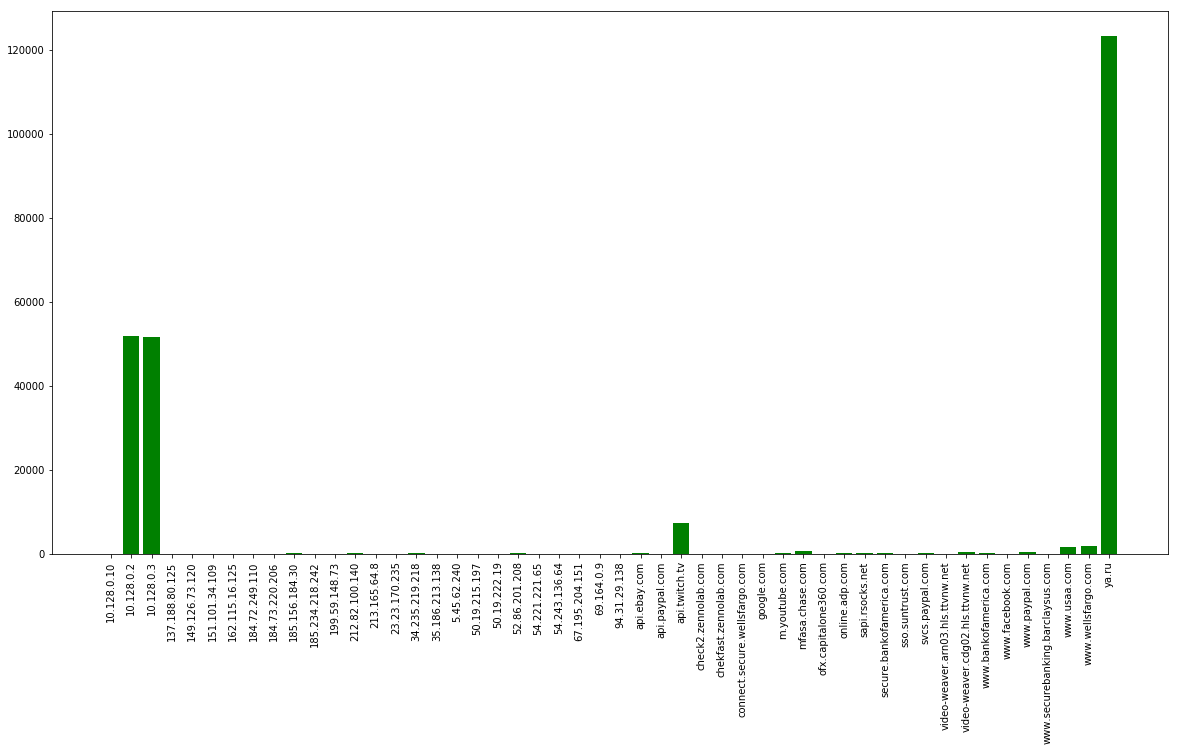

In [86]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(dst_ip_dic.keys(), dst_ip_dic.values(),align='center',color='g')
plt.savefig('dst_ip.jpg')

In [94]:
df['dst_ip'].value_counts()[50:100]

216.58.216.3                        20
api.fedex.com                       20
162.115.208.125                     20
www.ip-score.com                    20
login.live.com                      20
157.240.21.35                       18
video-weaver.ams02.hls.ttvnw.net    18
216.58.210.14                       16
172.217.11.67                       16
www.accountonline.com               16
m.chase.com                         16
kartinki-risunki.ru                 16
192.107.16.41                       16
107.23.102.22                       14
52.22.73.8                          14
104.86.235.152                      12
mobile.usaa.com                     12
chek.zennolab.com                   12
87.248.114.12                       10
signin.m.ebay.com                   10
192.95.35.145                       10
66.150.209.249                       8
87.248.114.11                        8
199.16.156.43                        8
twitter.com                          8
104.244.42.193           

In [70]:
df['data'].value_counts()

'GET / HTTP/1.1\r\nUser-Agent: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.146 Safari/537.36\r\nHost: www.alexa.com\r\nAccept: */*\r\n\r\n'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [56]:
dict = { dst_ip: df[dst_ip] for dst_ip in columns  }

In [57]:
dict

{'compCS': 0             NaN
 1          [none]
 2             NaN
 3             NaN
 4             NaN
 5             NaN
 6          [none]
 7             NaN
 8             NaN
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 13            NaN
 14            NaN
 15            NaN
 16            NaN
 17            NaN
 18            NaN
 19            NaN
 20            NaN
 21            NaN
 22            NaN
 23            NaN
 24            NaN
 25            NaN
 26            NaN
 27            NaN
 28            NaN
 29            NaN
             ...  
 1951697       NaN
 1951698       NaN
 1951699       NaN
 1951700       NaN
 1951701       NaN
 1951702       NaN
 1951703       NaN
 1951704       NaN
 1951705       NaN
 1951706    [none]
 1951707       NaN
 1951708       NaN
 1951709    [none]
 1951710       NaN
 1951711       NaN
 1951712       NaN
 1951713       NaN
 1951714       NaN
 1951715       NaN
 1951716       NaN
 1951717       NaN
 1

In [39]:

w = most_common.to_dict() #convert to dictionary

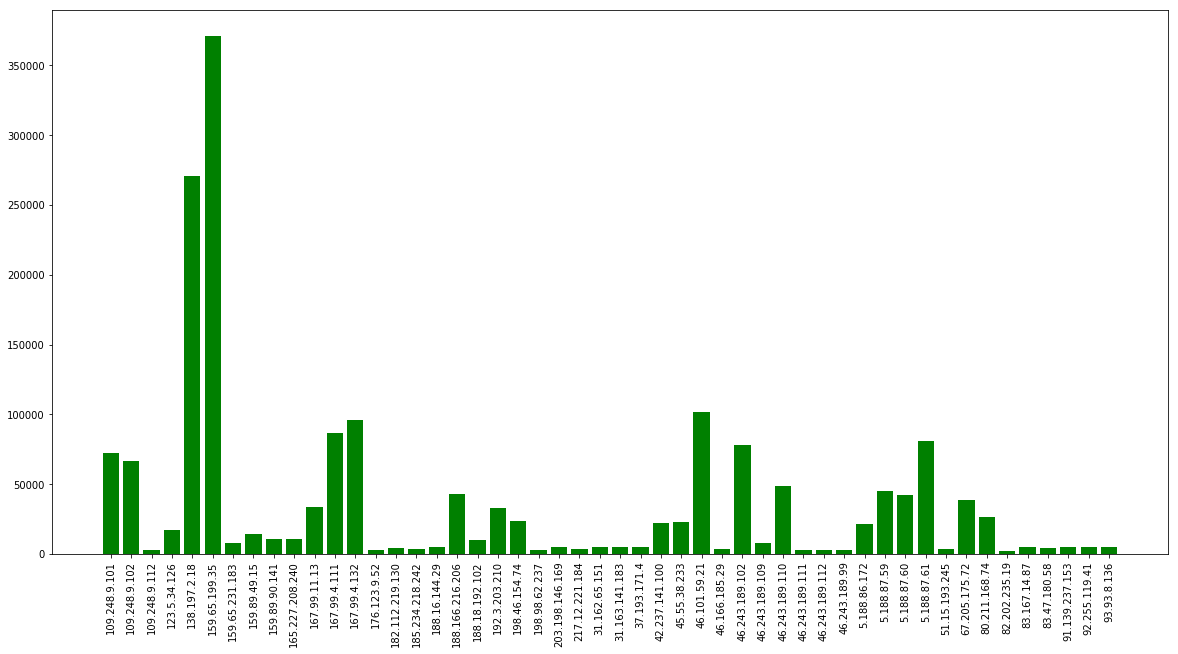

In [93]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(w.keys(), w.values(),align='center',color='g')
plt.savefig('ip.jpg')

In [9]:
t = df['src_ip'].value_counts()[:200]

In [10]:
t_dict = t.to_dict()

In [11]:
a=[]
for i in t_dict.keys():
    a.append(i)

In [12]:
a

['159.65.199.35',
 '138.197.2.18',
 '46.101.59.21',
 '167.99.4.132',
 '167.99.4.111',
 '5.188.87.61',
 '46.243.189.102',
 '109.248.9.101',
 '109.248.9.102',
 '46.243.189.110',
 '5.188.87.59',
 '188.166.216.206',
 '5.188.87.60',
 '67.205.175.72',
 '167.99.11.13',
 '192.3.203.210',
 '80.211.168.74',
 '198.46.154.74',
 '45.55.38.233',
 '42.237.141.100',
 '5.188.86.172',
 '123.5.34.126',
 '159.89.49.15',
 '165.227.208.240',
 '159.89.90.141',
 '188.18.192.102',
 '159.65.231.183',
 '46.243.189.109',
 '188.16.144.29',
 '83.167.14.87',
 '92.255.119.41',
 '31.163.141.183',
 '31.162.65.151',
 '91.139.237.153',
 '203.198.146.169',
 '37.193.171.4',
 '93.93.8.136',
 '83.47.180.58',
 '182.112.219.130',
 '185.234.218.242',
 '51.15.193.245',
 '217.12.221.184',
 '46.166.185.29',
 '46.243.189.112',
 '109.248.9.112',
 '46.243.189.111',
 '198.98.62.237',
 '176.123.9.52',
 '46.243.189.99',
 '82.202.235.19',
 '167.99.37.9',
 '186.193.148.85',
 '45.35.190.32',
 '94.177.240.233',
 '172.86.120.241',
 '176.226.

In [ ]:
len(a)

In [63]:
len(a)

150

In [13]:
x = df['src_ip'].unique().  

SyntaxError: invalid syntax (<ipython-input-13-33949292568a>, line 1)

In [31]:
len(x)

6723

In [64]:
import socket
host = []
for i in range(len(a)):
    try:
        host.append(socket.gethostbyaddr(a[i]))
    except:
        host.append('nullhost')

In [65]:
host

[('165546.cloudwaysapps.com', [], ['159.65.199.35']),
 'nullhost',
 'nullhost',
 'nullhost',
 'nullhost',
 ('hostby.channelnet.ie', [], ['5.188.87.61']),
 'nullhost',
 'nullhost',
 'nullhost',
 'nullhost',
 ('irs-ausa.com', [], ['5.188.87.59']),
 'nullhost',
 ('hostby.channelnet.ie', [], ['5.188.87.60']),
 ('runwaysubjective.com', [], ['67.205.175.72']),
 'nullhost',
 ('192-3-203-210-host.colocrossing.com', [], ['192.3.203.210']),
 ('host74-168-211-80.serverdedicati.aruba.it', [], ['80.211.168.74']),
 ('198-46-154-74-host.colocrossing.com', [], ['198.46.154.74']),
 'nullhost',
 ('hn.kd.ny.adsl', [], ['42.237.141.100']),
 ('hostby.channelnet.ie', [], ['5.188.86.172']),
 ('hn.kd.ny.adsl', [], ['123.5.34.126']),
 'nullhost',
 'nullhost',
 ('pageslooking.com', [], ['159.89.90.141']),
 'nullhost',
 'nullhost',
 'nullhost',
 'nullhost',
 'nullhost',
 'nullhost',
 ('ws183.zone31-163-141.zaural.ru', [], ['31.163.141.183']),
 'nullhost',
 ('giusef.haskovo.ddns.bulsat.com', [], ['91.139.237.153'

To find where are the IP locations

In [9]:
import requests

print (requests.get('http://ipinfo.io/101.96.121.172/country').text)

VN



In [105]:
import requests
for i in a:
    n = 'http://ipinfo.io/' + i + '/geo'
    print (requests.get(n).json())
    

{'ip': '159.65.199.35', 'city': 'Amsterdam', 'region': 'North Holland', 'country': 'NL', 'loc': '52.3529,4.9415', 'postal': '1098'}
{'ip': '138.197.2.18', 'city': 'Clifton', 'region': 'New Jersey', 'country': 'US', 'loc': '40.8326,-74.1307', 'postal': '07014'}
{'ip': '46.101.59.21', 'city': 'London', 'region': 'England', 'country': 'GB', 'loc': '51.5142,-0.0931', 'postal': 'EC2V'}
{'ip': '167.99.4.132', 'city': 'North Bergen', 'region': 'New Jersey', 'country': 'US', 'loc': '40.7904,-74.0246', 'postal': '07047'}
{'ip': '167.99.4.111', 'city': 'North Bergen', 'region': 'New Jersey', 'country': 'US', 'loc': '40.7904,-74.0246', 'postal': '07047'}
{'ip': '5.188.87.61', 'city': 'St Petersburg', 'region': 'St.-Petersburg', 'country': 'RU', 'loc': '59.8944,30.2642', 'postal': '190826'}
{'ip': '46.243.189.102', 'city': '', 'region': '', 'country': 'NL', 'loc': '52.3824,4.8995'}
{'ip': '109.248.9.101', 'city': 'Coity', 'region': 'Bridgend', 'country': 'GB', 'loc': '51.5217,-3.5531', 'postal': '

{'ip': '107.182.16.112', 'city': 'Wilkes-Barre', 'region': 'Pennsylvania', 'country': 'US', 'loc': '41.2029,-75.9027', 'postal': '18706'}
{'ip': '79.181.165.100', 'city': 'Haifa', 'region': 'Haifa', 'country': 'IL', 'loc': '32.8156,34.9892'}
{'ip': '185.189.196.158', 'city': 'Bansko', 'region': 'Blagoevgrad', 'country': 'BG', 'loc': '41.8394,23.5000', 'postal': '2770'}
{'ip': '198.175.126.88', 'city': 'Seattle', 'region': 'Washington', 'country': 'US', 'loc': '47.4891,-122.2910', 'postal': '98168'}
{'ip': '222.116.169.69', 'city': 'Cheongju-si', 'region': 'North Chungcheong', 'country': 'KR', 'loc': '36.6372,127.4900'}
{'ip': '185.165.29.196', 'city': 'Bushehr', 'region': 'Bushehr', 'country': 'IR', 'loc': '28.9684,50.8385'}
{'ip': '31.162.135.64', 'city': 'Surgut', 'region': 'Khanty-Mansia', 'country': 'RU', 'loc': '61.2500,73.4167', 'postal': '628401'}
{'ip': '110.227.176.146', 'city': 'Noida', 'region': 'Uttar Pradesh', 'country': 'IN', 'loc': '28.5700,77.3200', 'postal': '201310'}


{'ip': '106.51.5.129', 'city': 'Waltair', 'region': 'Andhra Pradesh', 'country': 'IN', 'loc': '17.7167,83.3333'}
{'ip': '159.89.32.130', 'city': 'Clifton', 'region': 'New Jersey', 'country': 'US', 'loc': '40.8326,-74.1307', 'postal': '07014'}
{'ip': '91.234.99.199', 'city': '', 'region': '', 'country': 'NL', 'loc': '52.3824,4.8995'}
{'ip': '54.36.10.66', 'city': 'Hand', 'region': 'Nordrhein-Westfalen', 'country': 'DE', 'loc': '50.8000,6.0500', 'postal': '51469'}
{'ip': '121.18.238.115', 'city': 'Hebei', 'region': 'Hebei', 'country': 'CN', 'loc': '39.8897,115.2750'}
{'ip': '85.157.17.209', 'city': 'Kokkola', 'region': 'Central Ostrobothnia', 'country': 'FI', 'loc': '63.8333,23.1167', 'postal': '67100'}
{'ip': '41.38.81.190', 'city': 'Cairo', 'region': 'Cairo Governorate', 'country': 'EG', 'loc': '30.0771,31.2859'}
{'ip': '220.117.141.165', 'city': 'Seoul', 'region': 'Seoul', 'country': 'KR', 'loc': '37.5985,126.9780'}
{'ip': '46.17.43.251', 'city': '', 'region': '', 'country': 'RU', 'lo

In [204]:
import requests
p = []
for i in a:
    n = 'http://ipinfo.io/' + i + '/geo'
    x = requests.get(n).json()
    s = x.get('country', None)
    p.append(s)

In [211]:
country = pd.DataFrame({'country':p})

In [214]:
np.unique(country)

array(['AE', 'AR', 'BG', 'BR', 'CA', 'CN', 'CO', 'DE', 'EC', 'EG', 'ES',
       'FI', 'FR', 'GB', 'HK', 'HR', 'IE', 'IL', 'IN', 'IR', 'IT', 'JP',
       'KR', 'MD', 'MX', 'MY', 'NL', 'PE', 'RO', 'RU', 'SA', 'SC', 'SE',
       'SG', 'TH', 'UA', 'US', 'UY', 'VN', 'ZA'], dtype=object)

In [220]:
for i in np.unique(country):
    print(i,p.count(i))

AE 1
AR 1
BG 4
BR 3
CA 1
CN 29
CO 2
DE 3
EC 2
EG 1
ES 1
FI 1
FR 7
GB 12
HK 2
HR 1
IE 2
IL 1
IN 5
IR 2
IT 3
JP 12
KR 6
MD 1
MX 1
MY 2
NL 15
PE 1
RO 1
RU 21
SA 1
SC 1
SE 3
SG 1
TH 1
UA 3
US 42
UY 2
VN 1
ZA 1


In [218]:
p.count('CN')

29

In [120]:
import requests
i=[]
for i in a:
    n = 'http://ipinfo.io/' + i + '/geo'
    x = requests.get(n).json()
    s = x.get('loc', None)
    print(s)
    

52.3529,4.9415
40.8326,-74.1307
51.5142,-0.0931
40.7904,-74.0246
40.7904,-74.0246
59.8944,30.2642
52.3824,4.8995
51.5217,-3.5531
51.5217,-3.5531
52.3824,4.8995
59.8944,30.2642
1.2931,103.8560
59.8944,30.2642
40.7904,-74.0246
40.7904,-74.0246
52.0537,4.4924
43.4667,11.8167
42.8884,-78.8761
40.8326,-74.1307
34.6836,113.5330
51.9000,-8.9500
34.6836,113.5330
40.7904,-74.0246
40.8326,-74.1307
40.7904,-74.0246
57.1522,65.5272
40.7904,-74.0246
52.3824,4.8995
55.1540,61.4291
56.8263,60.5388
60.0922,30.2368
55.4500,65.3333
56.4056,61.9278
42.4833,26.5000
22.3667,114.1000
55.0411,82.9344
42.6833,23.3167
41.9627,-7.9239
34.6836,113.5330
53.3472,-6.2439
48.8582,2.3387
50.4500,30.5233
52.3666,4.9027
52.3824,4.8995
51.5217,-3.5531
52.3824,4.8995
42.8865,-78.8784
47.0056,28.8575
52.3824,4.8995
55.7386,37.6068
52.3529,4.9415
-21.7869,-46.5646
32.8148,-96.8705
48.8637,2.3615
36.0877,-115.1480
55.1544,61.4297
51.5217,-3.5531
37.3501,-121.9850
-20.4500,-54.6167
51.4964,-0.1224
44.8250,13.8661
51.5142,-0.

In [42]:
import xlsxwriter
import requests
from time import sleep
import json
data = {}

for i in a:
    #print ("IP %s of %s" % (str(x.index(i)), str(len(x))))
    r = requests.get('https://tools.keycdn.com/geo.json?host=%s' % i)
    try: 
        j = json.loads(r.text)
        print (j['data']['geo'])
        data[i] = j
    except Exception:
        print ("failed for IP %s: response code %s, text %s" % (i, r.status_code, r.text))
        data[i] = None

    sleep(2) # API is rate-limited 

workbook = xlsxwriter.Workbook('loc_data.xlsx')
worksheet = workbook.add_worksheet()
headings = ['IP Address', 'Latitude', 'Longitude', 'Country', 'Region', 'City', 'Postal Code', 'ISP', 'Host', 'ASN']
keys = ['ip', 'latitude', 'longitude', 'country_name', 'region', 'city', 'postal_code', 'isp', 'host', 'asn']

#159.65.199.35 cloudways https://www.cloudways.com/en/
# 114.142.45.14 http://www.bbiq.jp/
#

{'host': '159.65.199.35', 'ip': '159.65.199.35', 'rdns': '159.65.199.35', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'Netherlands', 'country_code': 'NL', 'region': '07', 'city': 'Amsterdam', 'postal_code': '1098', 'continent_code': 'EU', 'latitude': '52.35290145874', 'longitude': '4.9415001869202', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Amsterdam', 'datetime': '2018-04-21 01:05:05'}
{'host': '138.197.2.18', 'ip': '138.197.2.18', 'rdns': '138.197.2.18', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United States', 'country_code': 'US', 'region': 'NJ', 'city': 'Clifton', 'postal_code': '07014', 'continent_code': 'NA', 'latitude': '40.832599639893', 'longitude': '-74.130699157715', 'dma_code': '501', 'area_code': '973', 'timezone': 'America/New_York', 'datetime': '2018-04-20 19:05:07'}
{'host': '46.101.59.21', 'ip': '46.101.59.21', 'rdns': '46.101.59.21', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United Kingdom', 

{'host': '5.188.86.172', 'ip': '5.188.86.172', 'rdns': 'hostby.channelnet.ie', 'asn': 'AS49453', 'isp': 'Global Layer B.V. ', 'country_name': 'Ireland', 'country_code': 'IE', 'region': '04', 'city': 'Macroom', 'postal_code': 'P12', 'continent_code': 'EU', 'latitude': '51.900001525879', 'longitude': '-8.9499998092651', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Dublin', 'datetime': '2018-04-21 00:05:48'}
{'host': '123.5.34.126', 'ip': '123.5.34.126', 'rdns': 'hn.kd.ny.adsl', 'asn': 'AS4837', 'isp': 'CHINA UNICOM China169 Backbone ', 'country_name': 'China', 'country_code': 'CN', 'region': '09', 'city': 'Zhengzhou', 'postal_code': '', 'continent_code': 'AS', 'latitude': '34.683601379395', 'longitude': '113.5325012207', 'dma_code': '0', 'area_code': '0', 'timezone': 'Asia/Shanghai', 'datetime': '2018-04-21 07:05:50'}
{'host': '159.89.49.15', 'ip': '159.89.49.15', 'rdns': '159.89.49.15', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United States', 'country_co

{'host': '51.15.193.245', 'ip': '51.15.193.245', 'rdns': '245-193-15-51.rev.cloud.scaleway.com', 'asn': 'AS12876', 'isp': 'Online S.a.s. ', 'country_name': 'France', 'country_code': 'FR', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '48.858200073242', 'longitude': '2.338700056076', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '217.12.221.184', 'ip': '217.12.221.184', 'rdns': 'unallocated.layer6.net', 'asn': 'AS15626', 'isp': 'ITL Company ', 'country_name': 'Ukraine', 'country_code': 'UA', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '50.450000762939', 'longitude': '30.523300170898', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '46.166.185.29', 'ip': '46.166.185.29', 'rdns': 'shop6.azulmarketop.pw', 'asn': 'AS43350', 'isp': 'NForce Entertainment B.V. ', 'country_name': 'Netherlands', 'country_code': 'NL', 'region': '', 'city': '', 'postal_code': '', '

{'host': '5.188.10.144', 'ip': '5.188.10.144', 'rdns': '5.188.10.144', 'asn': 'AS58222', 'isp': 'Solar Invest UK LTD. ', 'country_name': 'Croatia', 'country_code': 'HR', 'region': '04', 'city': 'Pula', 'postal_code': '52100', 'continent_code': 'EU', 'latitude': '44.868301391602', 'longitude': '13.848099708557', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Zagreb', 'datetime': '2018-04-21 01:07:16'}
{'host': '159.65.27.228', 'ip': '159.65.27.228', 'rdns': '159.65.27.228', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United Kingdom', 'country_code': 'GB', 'region': 'M1', 'city': 'London', 'postal_code': 'EC2V', 'continent_code': 'EU', 'latitude': '51.514198303223', 'longitude': '-0.093099996447563', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/London', 'datetime': '2018-04-21 00:07:19'}
{'host': '172.81.132.100', 'ip': '172.81.132.100', 'rdns': '172.81.132.100', 'asn': 'AS27176', 'isp': 'DataWagon LLC ', 'country_name': 'United States', 'country_cod

{'host': '178.132.2.24', 'ip': '178.132.2.24', 'rdns': '178.132.2.24', 'asn': 'AS49981', 'isp': 'WorldStream B.V. ', 'country_name': 'Netherlands', 'country_code': 'NL', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '52.382400512695', 'longitude': '4.8994998931885', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '5.101.40.10', 'ip': '5.101.40.10', 'rdns': '5.101.40.10', 'asn': 'AS57043', 'isp': 'Hostkey B.v. ', 'country_name': 'Russian Federation', 'country_code': 'RU', 'region': '66', 'city': 'Saint Petersburg', 'postal_code': '190826', 'continent_code': 'EU', 'latitude': '59.894401550293', 'longitude': '30.264200210571', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Moscow', 'datetime': '2018-04-21 02:08:22'}
{'host': '221.194.47.239', 'ip': '221.194.47.239', 'rdns': '221.194.47.239', 'asn': 'AS4837', 'isp': 'CHINA UNICOM China169 Backbone ', 'country_name': 'China', 'country_code': 'CN', 'region': '10', 'city

{'host': '5.196.76.41', 'ip': '5.196.76.41', 'rdns': 'ns335510.ip-5-196-76.eu', 'asn': 'AS16276', 'isp': 'OVH SAS ', 'country_name': 'France', 'country_code': 'FR', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '48.858200073242', 'longitude': '2.338700056076', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '167.99.5.22', 'ip': '167.99.5.22', 'rdns': '167.99.5.22', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United States', 'country_code': 'US', 'region': 'NJ', 'city': 'North Bergen', 'postal_code': '07047', 'continent_code': 'NA', 'latitude': '40.79040145874', 'longitude': '-74.024597167969', 'dma_code': '501', 'area_code': '201', 'timezone': 'America/New_York', 'datetime': '2018-04-20 19:10:45'}
{'host': '122.226.181.166', 'ip': '122.226.181.166', 'rdns': '122.226.181.166', 'asn': 'AS4134', 'isp': 'No.31,Jin-rong Street ', 'country_name': 'China', 'country_code': 'CN', 'region': '30', 'city': 'Huizho

{'host': '165.227.197.82', 'ip': '165.227.197.82', 'rdns': '165.227.197.82', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United States', 'country_code': 'US', 'region': 'NJ', 'city': 'North Bergen', 'postal_code': '07047', 'continent_code': 'NA', 'latitude': '40.79040145874', 'longitude': '-74.024597167969', 'dma_code': '501', 'area_code': '201', 'timezone': 'America/New_York', 'datetime': '2018-04-20 19:11:26'}
{'host': '185.165.29.183', 'ip': '185.165.29.183', 'rdns': '185.165.29.183', 'asn': 'AS44679', 'isp': 'Sc Ad Net Market Media Srl ', 'country_name': 'Iran, Islamic Republic of', 'country_code': 'IR', 'region': '22', 'city': 'Bushehr', 'postal_code': '', 'continent_code': 'AS', 'latitude': '28.968399047852', 'longitude': '50.838500976562', 'dma_code': '0', 'area_code': '0', 'timezone': 'Asia/Tehran', 'datetime': '2018-04-21 03:41:28'}
{'host': '121.18.238.125', 'ip': '121.18.238.125', 'rdns': '121.18.238.125', 'asn': 'AS4837', 'isp': 'CHINA UNICOM China169 Ba

{'host': '159.89.32.130', 'ip': '159.89.32.130', 'rdns': '159.89.32.130', 'asn': 'AS14061', 'isp': 'DigitalOcean, LLC ', 'country_name': 'United States', 'country_code': 'US', 'region': 'NJ', 'city': 'Clifton', 'postal_code': '07014', 'continent_code': 'NA', 'latitude': '40.832599639893', 'longitude': '-74.130699157715', 'dma_code': '501', 'area_code': '973', 'timezone': 'America/New_York', 'datetime': '2018-04-20 19:12:14'}
{'host': '91.234.99.199', 'ip': '91.234.99.199', 'rdns': '91.234.99.199', 'asn': 'AS48666', 'isp': 'MAROSNET Telecommunication Company LLC ', 'country_name': 'Netherlands', 'country_code': 'NL', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '52.382400512695', 'longitude': '4.8994998931885', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '54.36.10.66', 'ip': '54.36.10.66', 'rdns': '54.36.10.66.srv-host.xyz', 'asn': 'AS16276', 'isp': 'OVH SAS ', 'country_name': 'France', 'country_code': 'FR', 'region':

{'host': '154.73.17.222', 'ip': '154.73.17.222', 'rdns': '154.73.17.222', 'asn': 'AS327737', 'isp': 'Custom Solutions Business Trust ', 'country_name': 'South Africa', 'country_code': 'ZA', 'region': '06', 'city': 'Pretoria', 'postal_code': '0182', 'continent_code': 'AF', 'latitude': '-25.677099227905', 'longitude': '28.186700820923', 'dma_code': '0', 'area_code': '0', 'timezone': 'Africa/Johannesburg', 'datetime': '2018-04-21 01:13:17'}
{'host': '213.21.83.3', 'ip': '213.21.83.3', 'rdns': '213-21-83-3.customer.t3.se', 'asn': 'AS28908', 'isp': 'A3 Sverige AB ', 'country_name': 'Sweden', 'country_code': 'SE', 'region': '23', 'city': 'Norsjö', 'postal_code': '935 21', 'continent_code': 'EU', 'latitude': '64.916702270508', 'longitude': '19.483299255371', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Stockholm', 'datetime': '2018-04-21 01:13:19'}
{'host': '5.9.178.138', 'ip': '5.9.178.138', 'rdns': '5-9-178-138.cinfuserver.com', 'asn': 'AS24940', 'isp': 'Hetzner Online GmbH ', 'co

{'host': '93.170.114.11', 'ip': '93.170.114.11', 'rdns': 'unallocated.unioncom.net.ua', 'asn': 'AS197520', 'isp': 'UnionCOM Ltd ', 'country_name': 'Ukraine', 'country_code': 'UA', 'region': '12', 'city': 'Kiev', 'postal_code': '03049', 'continent_code': 'EU', 'latitude': '50.454700469971', 'longitude': '30.52379989624', 'dma_code': '0', 'area_code': '0', 'timezone': 'Europe/Kiev', 'datetime': '2018-04-21 02:14:28'}
{'host': '163.172.104.31', 'ip': '163.172.104.31', 'rdns': 'es2.events.oxom.com', 'asn': 'AS12876', 'isp': 'Online S.a.s. ', 'country_name': 'France', 'country_code': 'FR', 'region': '', 'city': '', 'postal_code': '', 'continent_code': 'EU', 'latitude': '48.858200073242', 'longitude': '2.338700056076', 'dma_code': '0', 'area_code': '0', 'timezone': '', 'datetime': 'na'}
{'host': '167.61.216.43', 'ip': '167.61.216.43', 'rdns': 'r167-61-216-43.dialup.adsl.anteldata.net.uy', 'asn': 'AS6057', 'isp': 'Administracion Nacional de Telecomunicaciones ', 'country_name': 'Uruguay', 'co

{'host': '201.236.248.116', 'ip': '201.236.248.116', 'rdns': 'pei-201-236-ccxlviii-cxvi.une.net.co', 'asn': 'AS13489', 'isp': 'EPM Telecomunicaciones S.A. E.S.P. ', 'country_name': 'Colombia', 'country_code': 'CO', 'region': '02', 'city': 'Medellin', 'postal_code': '050001', 'continent_code': 'SA', 'latitude': '6.2518000602722', 'longitude': '-75.563598632812', 'dma_code': '0', 'area_code': '0', 'timezone': 'America/Bogota', 'datetime': '2018-04-20 18:15:15'}


To find the inputs comes from certain IP address

In [221]:
for ip in most_common.to_dict():
     print (ip, df[df['src_ip'] == ip]['input'].unique())

159.65.199.35 [nan 'enable' 'shell' 'sh' '/bin/busybox daddyl33t'
 '/bin/busybox ps; /bin/busybox daddyl33t'
 '/bin/busybox cat /proc/mounts; /bin/busybox daddyl33t'
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/sys' > /sys/.nippon; /bin/busybox cat /sys/.nippon; /bin/busybox rm /sys/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/proc' > /proc/.nippon; /bin/busybox cat /proc/.nippon; /bin/busybox rm /proc/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/pts' > /dev/pts/.nippon; /bin/busybox cat /dev/pts/.nippon; /bin/busybox rm /dev/pts/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/run' > /run/.nippon; /bin/busybox cat /run/.nippon; /bin/busybox rm /run/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/shm' > /dev/shm/.ni

167.99.4.132 [nan 'enable' 'shell' 'sh' '/bin/busybox daddyl33t'
 '/bin/busybox ps; /bin/busybox daddyl33t'
 '/bin/busybox cat /proc/mounts; /bin/busybox daddyl33t'
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/sys' > /sys/.nippon; /bin/busybox cat /sys/.nippon; /bin/busybox rm /sys/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/proc' > /proc/.nippon; /bin/busybox cat /proc/.nippon; /bin/busybox rm /proc/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/pts' > /dev/pts/.nippon; /bin/busybox cat /dev/pts/.nippon; /bin/busybox rm /dev/pts/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/run' > /run/.nippon; /bin/busybox cat /run/.nippon; /bin/busybox rm /run/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/shm' > /dev/shm/.nip

5.188.87.60 [nan]
67.205.175.72 [nan 'enable' 'shell' 'sh' '/bin/busybox daddyl33t'
 '/bin/busybox ps; /bin/busybox daddyl33t'
 '/bin/busybox cat /proc/mounts; /bin/busybox daddyl33t'
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/sys' > /sys/.nippon; /bin/busybox cat /sys/.nippon; /bin/busybox rm /sys/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/proc' > /proc/.nippon; /bin/busybox cat /proc/.nippon; /bin/busybox rm /proc/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/pts' > /dev/pts/.nippon; /bin/busybox cat /dev/pts/.nippon; /bin/busybox rm /dev/pts/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/run' > /run/.nippon; /bin/busybox cat /run/.nippon; /bin/busybox rm /run/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/s

198.46.154.74 [nan '' 'enable' 'system' 'shell' 'sh' '>/tmp/.ptmx && cd /tmp/'
 '>/var/.ptmx && cd /var/' '>/dev/.ptmx && cd /dev/'
 '>/mnt/.ptmx && cd /mnt/' '>/var/run/.ptmx && cd /var/run/'
 '>/var/tmp/.ptmx && cd /var/tmp/' '>/.ptmx && cd /'
 '>/dev/netslink/.ptmx && cd /dev/netslink/'
 '>/dev/shm/.ptmx && cd /dev/shm/' '>/bin/.ptmx && cd /bin/'
 '>/etc/.ptmx && cd /etc/' '>/boot/.ptmx && cd /boot/'
 '>/usr/.ptmx && cd /usr/' '/bin/busybox rm -rf SO190Ij1X dropper'
 '/bin/busybox cp /bin/busybox SO190Ij1X; >SO190Ij1X; /bin/busybox chmod 777 SO190Ij1X; /bin/busybox SORA1337'
 '/bin/busybox cat /bin/busybox || while read i; do echo $i; done < /bin/busybox'
 'while read i' 'do echo' 'done < /bin/busybox' '/bin/busybox SORA1337']
45.55.38.233 [nan 'enable' 'shell' 'sh' '/bin/busybox OWARI'
 '/bin/busybox ps; /bin/busybox OWARI'
 '/bin/busybox cat /proc/mounts; /bin/busybox OWARI'
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nipp

188.18.192.102 [nan 'enable' 'system' 'shell' 'sh' '/bin/busybox r3VmfLHt '
 '/bin/busybox cat /proc/mounts; /bin/busybox r3VmfLHt '
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/' > //.none; /bin/busybox cat //.none; /bin/busybox rm //.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/sys' > /sys/.none; /bin/busybox cat /sys/.none; /bin/busybox rm /sys/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/proc' > /proc/.none; /bin/busybox cat /proc/.none; /bin/busybox rm /proc/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev' > /dev/.none; /bin/busybox cat /dev/.none; /bin/busybox rm /dev/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/pts' > /dev/pts/.none; /bin/busybox cat /dev/pts/.none; /bin/busybox rm /dev/pts/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/run' > /run/.none; /bin/busybox cat /run/.none; /bin/busybox rm /run/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/shm' > /dev/shm/.none; /bin/busybox cat /dev/shm/.none; /bin/busybox rm /dev/shm/.no

188.16.144.29 [nan 'enable' 'system' 'shell' 'sh' '/bin/busybox dWq6WXhK ' 'su'
 'zyad5001' '/bin/busybox cat /proc/mounts; /bin/busybox dWq6WXhK '
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/' > //.none; /bin/busybox cat //.none; /bin/busybox rm //.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/sys' > /sys/.none; /bin/busybox cat /sys/.none; /bin/busybox rm /sys/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/proc' > /proc/.none; /bin/busybox cat /proc/.none; /bin/busybox rm /proc/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev' > /dev/.none; /bin/busybox cat /dev/.none; /bin/busybox rm /dev/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/pts' > /dev/pts/.none; /bin/busybox cat /dev/pts/.none; /bin/busybox rm /dev/pts/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/run' > /run/.none; /bin/busybox cat /run/.none; /bin/busybox rm /run/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/shm' > /dev/shm/.none; /bin/busybox cat /dev/shm/.none; /bin/busybox 

31.163.141.183 [nan 'enable' 'system' 'shell' 'sh' '/bin/busybox InGvo9Lm ' 'su'
 'zyad5001' '/bin/busybox cat /proc/mounts; /bin/busybox InGvo9Lm '
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/' > //.none; /bin/busybox cat //.none; /bin/busybox rm //.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/sys' > /sys/.none; /bin/busybox cat /sys/.none; /bin/busybox rm /sys/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/proc' > /proc/.none; /bin/busybox cat /proc/.none; /bin/busybox rm /proc/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev' > /dev/.none; /bin/busybox cat /dev/.none; /bin/busybox rm /dev/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/pts' > /dev/pts/.none; /bin/busybox cat /dev/pts/.none; /bin/busybox rm /dev/pts/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/run' > /run/.none; /bin/busybox cat /run/.none; /bin/busybox rm /run/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/shm' > /dev/shm/.none; /bin/busybox cat /dev/shm/.none; /bin/busybox

203.198.146.169 [nan 'enable' 'system' 'shell' 'sh' '/bin/busybox bOAwimaO ' 'su'
 'zyad5001' '/bin/busybox cat /proc/mounts; /bin/busybox bOAwimaO '
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/' > //.none; /bin/busybox cat //.none; /bin/busybox rm //.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/sys' > /sys/.none; /bin/busybox cat /sys/.none; /bin/busybox rm /sys/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/proc' > /proc/.none; /bin/busybox cat /proc/.none; /bin/busybox rm /proc/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev' > /dev/.none; /bin/busybox cat /dev/.none; /bin/busybox rm /dev/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/pts' > /dev/pts/.none; /bin/busybox cat /dev/pts/.none; /bin/busybox rm /dev/pts/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/run' > /run/.none; /bin/busybox cat /run/.none; /bin/busybox rm /run/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/shm' > /dev/shm/.none; /bin/busybox cat /dev/shm/.none; /bin/busybo

83.47.180.58 [nan 'enable' 'system' 'shell' 'sh' '/bin/busybox c8A78icj ' 'su'
 'zyad5001' '/bin/busybox cat /proc/mounts; /bin/busybox c8A78icj '
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/' > //.none; /bin/busybox cat //.none; /bin/busybox rm //.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/sys' > /sys/.none; /bin/busybox cat /sys/.none; /bin/busybox rm /sys/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/proc' > /proc/.none; /bin/busybox cat /proc/.none; /bin/busybox rm /proc/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev' > /dev/.none; /bin/busybox cat /dev/.none; /bin/busybox rm /dev/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/pts' > /dev/pts/.none; /bin/busybox cat /dev/pts/.none; /bin/busybox rm /dev/pts/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/run' > /run/.none; /bin/busybox cat /run/.none; /bin/busybox rm /run/.none"
 "/bin/busybox echo -e '\\x50\\x6f\\x72\\x74/dev/shm' > /dev/shm/.none; /bin/busybox cat /dev/shm/.none; /bin/busybox r

46.166.185.29 [nan 'enable' 'shell' 'sh' '/bin/busybox daddyl33t'
 '/bin/busybox ps; /bin/busybox daddyl33t'
 '/bin/busybox cat /proc/mounts; /bin/busybox daddyl33t'
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/sys' > /sys/.nippon; /bin/busybox cat /sys/.nippon; /bin/busybox rm /sys/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/proc' > /proc/.nippon; /bin/busybox cat /proc/.nippon; /bin/busybox rm /proc/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/pts' > /dev/pts/.nippon; /bin/busybox cat /dev/pts/.nippon; /bin/busybox rm /dev/pts/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/run' > /run/.nippon; /bin/busybox cat /run/.nippon; /bin/busybox rm /run/.nippon"
 "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev/shm' > /dev/shm/.ni

82.202.235.19 [nan '' 'enable' 'system' 'shell' 'ping ; sh' 'sh'
 '>/tmp/.ptmx && cd /tmp/' '>/var/.ptmx && cd /var/'
 '>/dev/.ptmx && cd /dev/' '>/mnt/.ptmx && cd /mnt/'
 '>/var/run/.ptmx && cd /var/run/' '>/var/tmp/.ptmx && cd /var/tmp/'
 '>/.ptmx && cd /' '>/dev/netslink/.ptmx && cd /dev/netslink/'
 '>/dev/shm/.ptmx && cd /dev/shm/' '>/bin/.ptmx && cd /bin/'
 '>/etc/.ptmx && cd /etc/' '>/boot/.ptmx && cd /boot/'
 '>/usr/.ptmx && cd /usr/' '/bin/busybox rm -rf SAIAKINA SAIAKUSO'
 '/bin/busybox cp /bin/busybox SAIAKINA; >SAIAKINA; /bin/busybox chmod 777 SAIAKINA; /bin/busybox VIRIA'
 '/bin/busybox cat /bin/busybox || while read i; do echo $i; done < /bin/busybox'
 'while read i' 'do echo' 'done < /bin/busybox' '/bin/busybox VIRIA']


In [224]:
command=df['input'].value_counts()[:50]

In [229]:
CMD=df['message'].value_counts()[:50]

In [230]:
CMD

direct-tcp connection request to ya.ru:443 from ::1:0                                                                                                                                                           88522
CMD: /bin/busybox daddyl33t                                                                                                                                                                                     68272
Remote SSH version: SSH-2.0-OpenSSH_7.3                                                                                                                                                                         50571
CMD: rm /dev/.t; rm /dev/.sh; rm /dev/.human                                                                                                                                                                    50418
CMD: rm /proc/sys/fs/binfmt_misc/.t; rm /proc/sys/fs/binfmt_misc/.sh; rm /proc/sys/fs/binfmt_misc/.human                                        

In [227]:
pd.DataFrame({'Input Commands':command.index,'frequency':command.values})

,Input Commands,frequency
0,shell,79078
1,/bin/busybox daddyl33t,68272
2,rm /dev/.t; rm /dev/.sh; rm /dev/.human,50418
3,rm /proc/sys/fs/binfmt_misc/.t; rm /proc/sys/f...,50402
4,rm /.t; rm /.sh; rm /.human,49510
5,/bin/busybox echo -e '\x6b\x61\x6d\x69/dev' > ...,48377
6,/bin/busybox echo -e '\x6b\x61\x6d\x69/proc/sy...,48368
7,/bin/busybox echo -e '\x6b\x61\x6d\x69' > /.ni...,48366
8,sh,42513
9,enable,36479


To find the most common inputs

In [12]:
df['input'].value_counts()

/bin/busybox daddyl33t                                                                                                                                                                                     42
shell                                                                                                                                                                                                      42
rm /.t; rm /.sh; rm /.human                                                                                                                                                                                30
rm /dev/.t; rm /dev/.sh; rm /dev/.human                                                                                                                                                                    29
rm /proc/sys/fs/binfmt_misc/.t; rm /proc/sys/fs/binfmt_misc/.sh; rm /proc/sys/fs/binfmt_misc/.human                                                                             

Which source ip has the longest duration

In [27]:
d_ip_dur = df[['src_ip','duration','session']]

In [28]:
d_ip_dur.sort_values('duration',ascending=False)

,src_ip,duration,session
54,80.211.168.74,126.350082,355b6ebfe72a
53,80.211.168.74,122.297099,355b6ebfe72a
117,191.193.112.220,104.899021,59f4e2c0757f
144,101.96.121.172,103.547531,cb567ca0a1c7
119,138.121.27.97,103.412850,b82f17bf9f30
116,191.193.112.220,102.253810,59f4e2c0757f
143,101.96.121.172,102.111251,cb567ca0a1c7
118,138.121.27.97,101.886840,b82f17bf9f30
77,47.36.0.221,101.837899,6e60f71de3f4
76,47.36.0.221,101.068673,6e60f71de3f4


In [35]:
df['session']

0      be66e21da0c5
1      be66e21da0c5
2      be66e21da0c5
3      be66e21da0c5
4      be66e21da0c5
5      be66e21da0c5
6      be66e21da0c5
7      be66e21da0c5
8      be66e21da0c5
9      355b6ebfe72a
10     355b6ebfe72a
11     355b6ebfe72a
12     355b6ebfe72a
13     355b6ebfe72a
14     355b6ebfe72a
15     355b6ebfe72a
16     355b6ebfe72a
17     355b6ebfe72a
18     355b6ebfe72a
19     355b6ebfe72a
20     355b6ebfe72a
21     355b6ebfe72a
22     355b6ebfe72a
23     355b6ebfe72a
24     355b6ebfe72a
25     355b6ebfe72a
26     355b6ebfe72a
27     355b6ebfe72a
28     355b6ebfe72a
29     355b6ebfe72a
           ...     
737    a3db744d7858
738    a3db744d7858
739    a3db744d7858
740    a3db744d7858
741    a3db744d7858
742    a3db744d7858
743    a3db744d7858
744    a3db744d7858
745    a3db744d7858
746    a3db744d7858
747    a3db744d7858
748    a3db744d7858
749    a3db744d7858
750    a3db744d7858
751    a3db744d7858
752    bae0e88704ff
753    bae0e88704ff
754    bae0e88704ff
755    bae0e88704ff


In [51]:
df['password'].value_counts()

admin           7
password        4
hunt5759        3
12345           2
                2
1234            1
anko            1
default         1
aquario         1
7ujMko0admin    1
vizxv           1
Name: password, dtype: int64

In [69]:
df.describe()

,dst_port,duration,isError,size,src_port
count,26.000000,18.000000,767.0,6.000000,26.000000
mean,22.807692,61.234133,0.0,3313.666667,48513.500000
std,0.401918,53.094575,0.0,1996.327294,7415.320299
min,22.000000,1.851280,0.0,1271.000000,36001.000000
25%,23.000000,2.309716,0.0,2856.000000,41342.250000
50%,23.000000,101.453286,0.0,2856.000000,49054.500000
75%,23.000000,103.123090,0.0,2863.500000,53973.250000
max,23.000000,126.350082,0.0,7177.000000,59351.000000


In [86]:
df.groupby('src_ip').count()

,compCS,dst_ip,dst_port,duration,encCS,eventid,input,isError,kexAlgs,keyAlgs,...,protocol,sensor,session,size,src_port,system,timestamp,ttylog,username,version
src_ip,,,,,,,,,,,,,,,,,,,,,
101.96.121.172,0,1,1,2,0,19,14,19,0,0,...,1,19,19,1,1,19,19,2,1,0
107.170.200.69,0,1,1,1,0,2,0,2,0,0,...,1,2,2,0,1,2,2,0,0,0
107.170.238.118,0,1,1,1,0,2,0,2,0,0,...,1,2,2,0,1,2,2,0,0,0
114.142.45.14,0,0,0,2,0,9,7,9,0,0,...,0,9,9,1,0,9,9,1,0,0
138.121.27.97,0,1,1,2,0,19,14,19,0,0,...,1,19,19,1,1,19,19,2,1,0
159.65.199.35,0,14,14,0,0,572,530,572,0,0,...,14,572,572,0,14,572,572,14,14,0
185.222.209.108,4,4,4,4,4,16,0,16,4,4,...,4,16,16,0,4,16,16,0,4,4
188.166.216.206,0,1,1,0,0,44,41,44,0,0,...,1,44,44,0,1,44,44,1,1,0
191.193.112.220,0,1,1,2,0,19,14,19,0,0,...,1,19,19,1,1,19,19,2,1,0


In [122]:
for i in a:
    r = requests.get('http://check.getipintel.net/check.php?ip=%s&contact=%s&flags=f' % (i, 'simin424@hotmail.com'))
    print ('%s : %s' % (i, r.text))
    data[i] = r.text
    sleep(5) # API is rate-limited 
    
#https://getipintel.net/index.php#web

159.65.199.35 : 1
138.197.2.18 : 1
46.101.59.21 : 1
167.99.4.132 : 1
167.99.4.111 : 1
5.188.87.61 : 1
46.243.189.102 : 0.996937486
109.248.9.101 : 0.2
109.248.9.102 : 0.2
46.243.189.110 : 0.9995406229
5.188.87.59 : 1
188.166.216.206 : 1
5.188.87.60 : 1
67.205.175.72 : 1
167.99.11.13 : 1
192.3.203.210 : 1
80.211.168.74 : 1
198.46.154.74 : 1
45.55.38.233 : 1
42.237.141.100 : 0.2
5.188.86.172 : 1
123.5.34.126 : 0.2
159.89.49.15 : 1
165.227.208.240 : 1
159.89.90.141 : 1
188.18.192.102 : 0.603
159.65.231.183 : 1
46.243.189.109 : 0.9995406229
188.16.144.29 : 0.756675
83.167.14.87 : 0.51975
92.255.119.41 : 0.429552
31.163.141.183 : 0.64404
31.162.65.151 : 0.4017312
91.139.237.153 : 0.67371982758621
203.198.146.169 : 0.999770480668
37.193.171.4 : 0.396
93.93.8.136 : 0.45
83.47.180.58 : 0.189
182.112.219.130 : 0
185.234.218.242 : 1
51.15.193.245 : 1
217.12.221.184 : 1
46.166.185.29 : 1
46.243.189.112 : 0.9995406229
109.248.9.112 : 0.2
46.243.189.111 : 0.9995406229
198.98.62.237 : 1
176.123.9.52

In [150]:
f = list(data.values())
f.count('1')

91

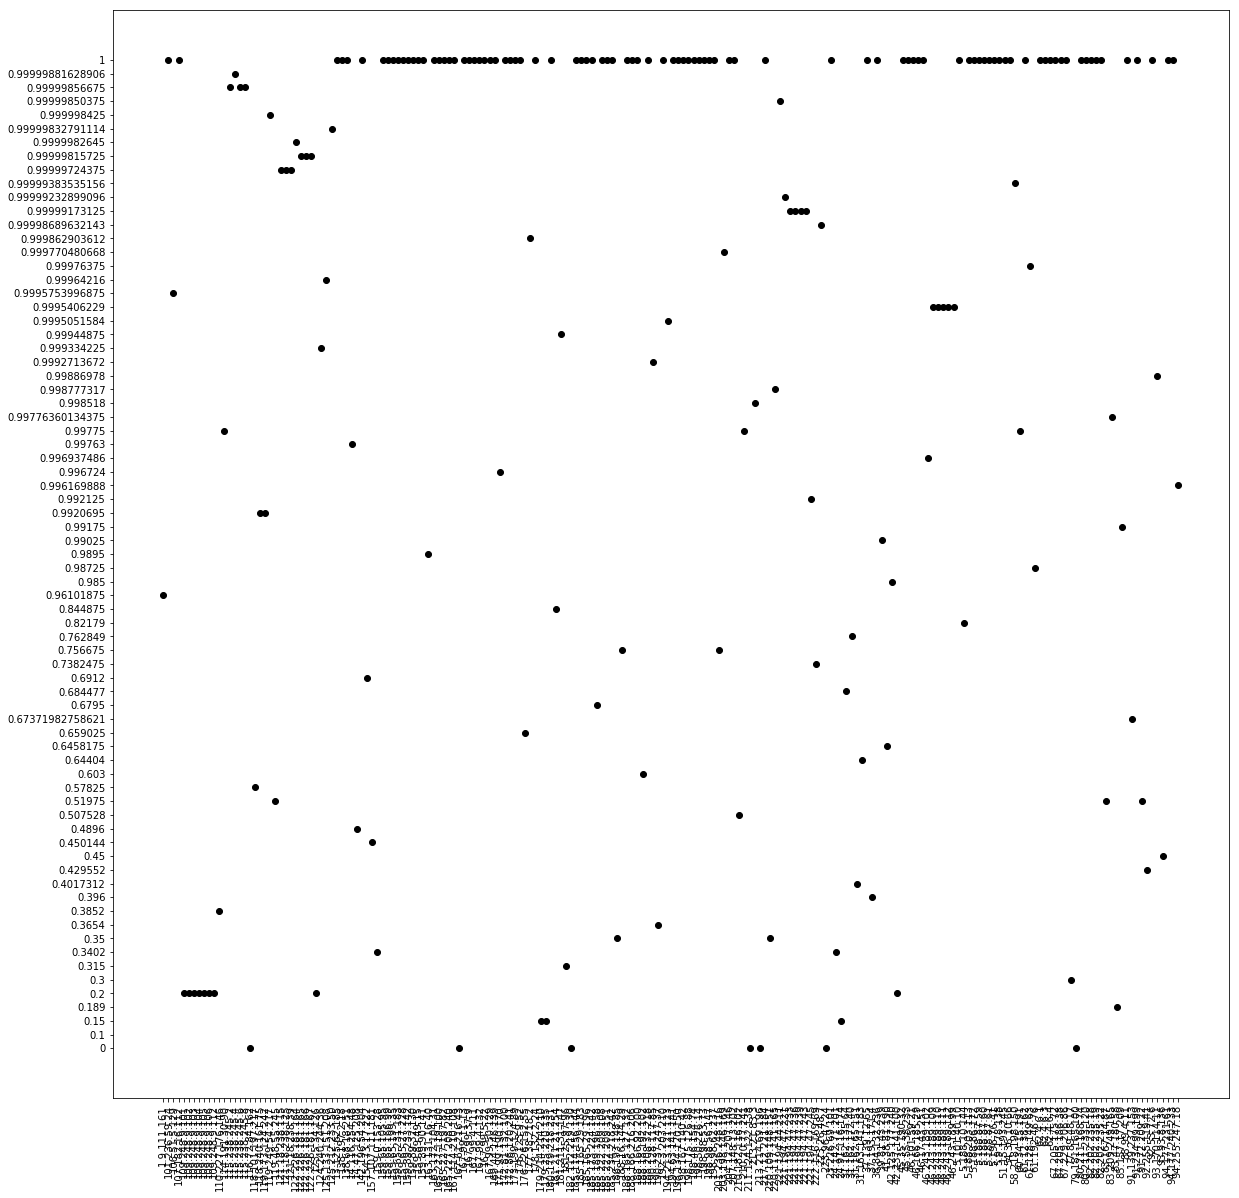

In [173]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.plot(data.keys(), data.values(),'o' ,color='black')
plt.savefig('ipscore.jpg')

In [75]:
df=df.copy()
df[df['message'].isin(['CMD'])]

,compCS,dst_ip,dst_port,duration,encCS,eventid,input,isError,kexAlgs,keyAlgs,...,sensor,session,size,src_ip,src_port,system,timestamp,ttylog,username,version


In [175]:
common_pw = df['password'].value_counts()[:50]

In [231]:
common_username = df['username'].value_counts()[:50]

In [232]:
pd.DataFrame({'Username':common_username.index,'frequency':common_username.values})

,Username,frequency
0,admin,58084
1,root,33404
2,enable ,3613
3,shell ,3549
4,default,1089
5,,889
6,user,459
7,support,405
8,guest,385
9,,266


In [194]:
pd.DataFrame({'Password':common_pw.index,'frequency':common_pw.values})

,Password,frequency
0,,51796
1,password,5244
2,hunt5759,4534
3,admin,3924
4,7ujMko0admin,3645
5,system ,3616
6,sh ,3548
7,anko,2901
8,vizxv,2691
9,12345,2645
